In [1]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from math import inf
import warnings
warnings.filterwarnings('ignore')
source_X = pd.read_csv('source_X4.csv')
source_y = pd.read_csv('source_y4.csv')
pred_X = pd.read_csv('pred_X-4.csv')
test = pd.read_csv('test.csv')

In [2]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(source_X,source_y,train_size = 0.8)

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
pipe = make_pipeline(StandardScaler(),
                    KNeighborsClassifier(n_jobs = -1))
param_range1 = [1,3,5,7,9]
param_range2 = [1,2,3,inf]
param_grid = {
    'kneighborsclassifier__n_neighbors':param_range1,
    'kneighborsclassifier__p': param_range2,
    'kneighborsclassifier__leaf_size': list(range(10,100,20))
}
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', # HN: try scoring='recall','precision',‘f1’,'accuracy' to see the best model change
                  refit=True,
                  cv=10,              # HN: try cv=5,10,15 to see the best model change
                  n_jobs=-1)
scores = cross_val_score(gs, train_X, train_y, 
                         scoring='accuracy', cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))
gs = gs.fit(train_X, train_y)

print("Best model: ", gs.best_params_)
print("Best score: ",gs.best_score_,"(train performance)")

# use the best model to test data.
clf = gs.best_estimator_
print('Best score: Test perfrmance: %.3f' % clf.score(test_X, test_y))
print('Best score: ', clf.score(test_X, test_y),"(Test perfrmance)")

CV accuracy: 0.774 +/- 0.056
Best model:  {'kneighborsclassifier__leaf_size': 10, 'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 1}
Best score:  0.797752808988764 (train performance)
Best score: Test perfrmance: 0.793
Best score:  0.7932960893854749 (Test perfrmance)


In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
train_sizes,train_score,test_score = learning_curve(estimator=gs,
                                                   X = train_X,
                                                   y = train_y,
                                                   train_sizes=np.linspace(0.1,1.0,10),
                                                   cv = 5,
                                                   n_jobs=-1)
train_mean = np.mean(train_score,axis = 1)
train_std  = np.std(train_score,axis = 1)
test_mean = np.mean(test_score,axis = 1)
test_std = np.std(test_score,axis = 1)

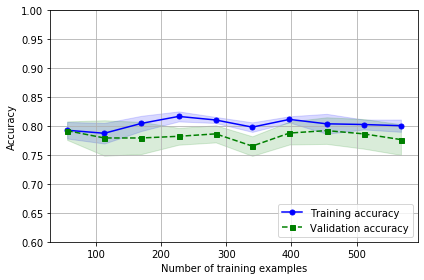

In [5]:
plt.plot(train_sizes,train_mean,
        color = 'blue',marker = 'o',
        markersize = 5,label = 'Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()
#plt.savefig('1.png', dpi=300)
plt.show()
# print("train_std:",train_std)
# print("test_std:",test_std)

In [6]:
pred_y = gs.predict(test_X)
print(metrics.accuracy_score(test_y,pred_y))

0.7932960893854749


In [7]:
pred_Y = gs.predict(pred_X)#使用我们创建的模型，对预测数据集中的生存情况进行预测
pred_Y = pred_Y.astype(int)#因为kaggle要求结果数据类型为int，我们进行数据类型转换
passengerId = test['PassengerId']
#创建结果集
predDf = pd.DataFrame(
    {
        'PassengerId':passengerId,
        'Survived':pred_Y
    }
)
#导出结果
predDf.to_csv('KNN-4.csv',index = False)